In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/cats-and-dogs-image-classification
/kaggle/input/cats-and-dogs-image-classification/test
/kaggle/input/cats-and-dogs-image-classification/test/dogs
/kaggle/input/cats-and-dogs-image-classification/test/cats
/kaggle/input/cats-and-dogs-image-classification/train
/kaggle/input/cats-and-dogs-image-classification/train/dogs
/kaggle/input/cats-and-dogs-image-classification/train/cats


In [2]:
import torchvision
from torchvision.datasets import ImageFolder
import torch

In [3]:
dataset = ImageFolder('/kaggle/input/cats-and-dogs-image-classification/train')

In [4]:
dataset.classes

['cats', 'dogs']

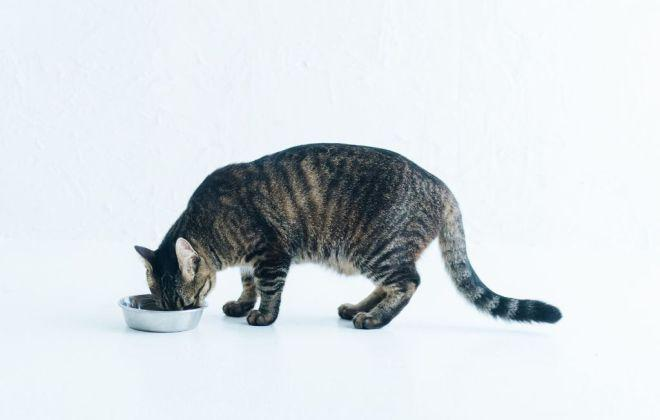

In [5]:
from IPython.display import display

display(dataset[200][0])

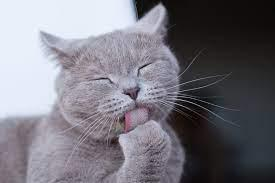

In [6]:
display(dataset[1][0])

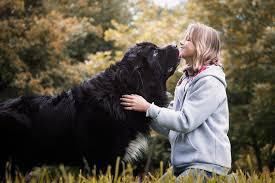

In [7]:
display(dataset[500][0])

In [8]:
len(dataset)

557

In [9]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((205,205)),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.Pad(25),
                                transforms.ToTensor()])

In [10]:
train_dataset = ImageFolder('/kaggle/input/cats-and-dogs-image-classification/train', transform = transform)

Calculate mean and standerd deviation to normalize the tensors

In [11]:
train_dataset[0][0].shape

torch.Size([3, 255, 255])

In [12]:
torch.mean(train_dataset[0][0],dim = (1,2))

tensor([0.3546, 0.3322, 0.3067])

In [13]:
torch.concat((train_dataset[0][0],train_dataset[1][0]), dim = 1 ).shape

torch.Size([3, 510, 255])

In [14]:
torch_concatinated = torch.concat([data[0] for data in train_dataset], dim = 1)

In [15]:
torch_concatinated.shape

torch.Size([3, 142035, 255])

In [16]:
mean = torch.mean(torch_concatinated, dim = (1,2))

In [17]:
mean

tensor([0.3797, 0.3613, 0.3228])

In [18]:
std_dev =torch.std(torch_concatinated, dim = (1,2))

In [19]:
additional_transform = transforms.Compose([
    transforms.Normalize(mean, std_dev)
])

train_dataset.transform.transforms.append(additional_transform)

In [20]:
train_dataset[0][0]

tensor([[[-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         ...,
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415],
         [-1.0415, -1.0415, -1.0415,  ..., -1.0415, -1.0415, -1.0415]],

        [[-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         ...,
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239],
         [-1.0239, -1.0239, -1.0239,  ..., -1.0239, -1.0239, -1.0239]],

        [[-0.9383, -0.9383, -0.9383,  ..., -0.9383, -0.9383, -0.9383],
         [-0.9383, -0.9383, -0.9383,  ..., -0

In [21]:
import matplotlib.pyplot as plt

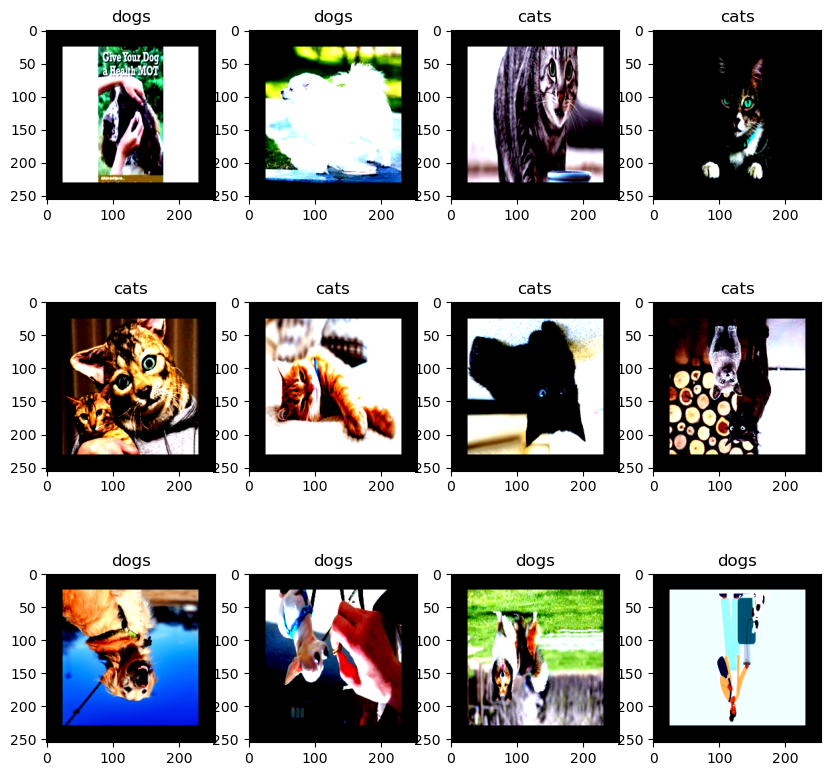

In [22]:
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns * rows + 1):
    idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[idx]
    class_name = train_dataset.classes[label]
    fig.add_subplot(rows, columns, i)
    plt.title(class_name)
    plt.imshow(img.permute(1, 2, 0))
plt.show()

Create DataLoader

In [23]:
test_dataset = ImageFolder('/kaggle/input/cats-and-dogs-image-classification/test', transform = transforms.Compose([
    transform,
    additional_transform
]))

In [24]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 140
    Root location: /kaggle/input/cats-and-dogs-image-classification/test
    StandardTransform
Transform: Compose(
               Compose(
               Resize(size=(205, 205), interpolation=bilinear, max_size=None, antialias=warn)
               RandomVerticalFlip(p=0.5)
               RandomHorizontalFlip(p=0.5)
               Pad(padding=25, fill=0, padding_mode=constant)
               ToTensor()
               Compose(
               Normalize(mean=tensor([0.3797, 0.3613, 0.3228]), std=tensor([0.3646, 0.3529, 0.3441]))
           )
           )
               Compose(
               Normalize(mean=tensor([0.3797, 0.3613, 0.3228]), std=tensor([0.3646, 0.3529, 0.3441]))
           )
           )

In [25]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=2)

Define Model

In [26]:
import torch.nn as nn


In [27]:
 class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(96),
            
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(256),
            
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),
            
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),
            
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.BatchNorm2d(256)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


create a model

In [28]:
model = AlexNet(2)


In [29]:
from tqdm import tqdm
import torch.nn.parallel as parallel

In [30]:
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = parallel.DataParallel(model)

# Move the model to the available device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Using 2 GPUs!


DataParallel(
  (module): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): ReLU(inplace=True)
      (13): BatchNorm2d(384, eps=1e-05, momentum=0.1,

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr =  0.001)


In [32]:
# Training loop
train_accuracies = []
test_accuracies = []
num_epochs = 50
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track train loss and accuracy
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate train accuracy and loss
    train_accuracy = correct_train / total_train
    train_loss = train_loss / total_train
    
    train_accuracies.append(train_accuracy)
    # Evaluation (Test)
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    # Calculate test accuracy and loss
    test_accuracy = correct_test / total_test
    test_loss = test_loss / total_test
    
    test_accuracies.append(test_accuracy)

    # Print epoch results
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.4f}")


100%|██████████| 140/140 [00:20<00:00,  6.94it/s]


Epoch 1/50 - Train Loss: 0.6967 - Train Acc: 0.5260 - Test Loss: 0.9237 - Test Acc: 0.5000


100%|██████████| 140/140 [00:10<00:00, 12.94it/s]


Epoch 2/50 - Train Loss: 0.6799 - Train Acc: 0.5655 - Test Loss: 2.0722 - Test Acc: 0.5000


100%|██████████| 140/140 [00:11<00:00, 12.38it/s]


Epoch 3/50 - Train Loss: 0.6672 - Train Acc: 0.6050 - Test Loss: 2.4718 - Test Acc: 0.5000


100%|██████████| 140/140 [00:10<00:00, 12.81it/s]


Epoch 4/50 - Train Loss: 0.6456 - Train Acc: 0.6373 - Test Loss: 2.9978 - Test Acc: 0.5000


100%|██████████| 140/140 [00:11<00:00, 11.94it/s]


Epoch 5/50 - Train Loss: 0.6347 - Train Acc: 0.6481 - Test Loss: 1.8846 - Test Acc: 0.5000


100%|██████████| 140/140 [00:11<00:00, 12.69it/s]


Epoch 6/50 - Train Loss: 0.6222 - Train Acc: 0.6499 - Test Loss: 1.7982 - Test Acc: 0.5214


100%|██████████| 140/140 [00:11<00:00, 12.69it/s]


Epoch 7/50 - Train Loss: 0.6116 - Train Acc: 0.6661 - Test Loss: 2.7071 - Test Acc: 0.5071


100%|██████████| 140/140 [00:11<00:00, 12.05it/s]


Epoch 8/50 - Train Loss: 0.6126 - Train Acc: 0.6517 - Test Loss: 2.3704 - Test Acc: 0.5071


100%|██████████| 140/140 [00:10<00:00, 12.89it/s]


Epoch 9/50 - Train Loss: 0.5960 - Train Acc: 0.6804 - Test Loss: 1.5459 - Test Acc: 0.5429


100%|██████████| 140/140 [00:11<00:00, 11.91it/s]


Epoch 10/50 - Train Loss: 0.5801 - Train Acc: 0.6948 - Test Loss: 4.0713 - Test Acc: 0.5000


100%|██████████| 140/140 [00:10<00:00, 12.84it/s]


Epoch 11/50 - Train Loss: 0.5547 - Train Acc: 0.7127 - Test Loss: 2.7371 - Test Acc: 0.5143


100%|██████████| 140/140 [00:10<00:00, 12.78it/s]


Epoch 12/50 - Train Loss: 0.5529 - Train Acc: 0.7199 - Test Loss: 2.8284 - Test Acc: 0.5286


100%|██████████| 140/140 [00:10<00:00, 12.87it/s]


Epoch 13/50 - Train Loss: 0.5466 - Train Acc: 0.7145 - Test Loss: 3.5786 - Test Acc: 0.5143


100%|██████████| 140/140 [00:11<00:00, 12.64it/s]


Epoch 14/50 - Train Loss: 0.5363 - Train Acc: 0.7271 - Test Loss: 2.5857 - Test Acc: 0.5286


100%|██████████| 140/140 [00:11<00:00, 12.34it/s]


Epoch 15/50 - Train Loss: 0.5324 - Train Acc: 0.7289 - Test Loss: 3.3804 - Test Acc: 0.5000


100%|██████████| 140/140 [00:11<00:00, 12.62it/s]


Epoch 16/50 - Train Loss: 0.4968 - Train Acc: 0.7469 - Test Loss: 3.9585 - Test Acc: 0.5143


100%|██████████| 140/140 [00:11<00:00, 12.13it/s]


Epoch 17/50 - Train Loss: 0.5053 - Train Acc: 0.7415 - Test Loss: 3.1838 - Test Acc: 0.5214


100%|██████████| 140/140 [00:10<00:00, 12.82it/s]


Epoch 18/50 - Train Loss: 0.4663 - Train Acc: 0.7810 - Test Loss: 3.6143 - Test Acc: 0.5357


100%|██████████| 140/140 [00:11<00:00, 12.64it/s]


Epoch 19/50 - Train Loss: 0.4778 - Train Acc: 0.7433 - Test Loss: 3.5589 - Test Acc: 0.5143


100%|██████████| 140/140 [00:11<00:00, 11.85it/s]


Epoch 20/50 - Train Loss: 0.4701 - Train Acc: 0.7576 - Test Loss: 2.4781 - Test Acc: 0.5643


100%|██████████| 140/140 [00:11<00:00, 12.64it/s]


Epoch 21/50 - Train Loss: 0.4769 - Train Acc: 0.7540 - Test Loss: 3.5636 - Test Acc: 0.5214


100%|██████████| 140/140 [00:11<00:00, 11.74it/s]


Epoch 22/50 - Train Loss: 0.4462 - Train Acc: 0.7702 - Test Loss: 4.0377 - Test Acc: 0.5143


100%|██████████| 140/140 [00:10<00:00, 12.79it/s]


Epoch 23/50 - Train Loss: 0.4513 - Train Acc: 0.7899 - Test Loss: 3.4720 - Test Acc: 0.5286


100%|██████████| 140/140 [00:11<00:00, 12.08it/s]


Epoch 24/50 - Train Loss: 0.4238 - Train Acc: 0.8043 - Test Loss: 2.1841 - Test Acc: 0.5429


100%|██████████| 140/140 [00:11<00:00, 12.58it/s]


Epoch 25/50 - Train Loss: 0.4230 - Train Acc: 0.7828 - Test Loss: 1.2726 - Test Acc: 0.6143


100%|██████████| 140/140 [00:11<00:00, 12.71it/s]


Epoch 26/50 - Train Loss: 0.3920 - Train Acc: 0.8330 - Test Loss: 1.9916 - Test Acc: 0.5786


100%|██████████| 140/140 [00:11<00:00, 12.05it/s]


Epoch 27/50 - Train Loss: 0.3857 - Train Acc: 0.8294 - Test Loss: 1.4539 - Test Acc: 0.5786


100%|██████████| 140/140 [00:11<00:00, 12.72it/s]


Epoch 28/50 - Train Loss: 0.3777 - Train Acc: 0.8276 - Test Loss: 1.8941 - Test Acc: 0.6286


100%|██████████| 140/140 [00:11<00:00, 12.09it/s]


Epoch 29/50 - Train Loss: 0.3925 - Train Acc: 0.8097 - Test Loss: 1.5369 - Test Acc: 0.6071


100%|██████████| 140/140 [00:10<00:00, 12.87it/s]


Epoch 30/50 - Train Loss: 0.3521 - Train Acc: 0.8618 - Test Loss: 1.5757 - Test Acc: 0.6357


100%|██████████| 140/140 [00:10<00:00, 12.78it/s]


Epoch 31/50 - Train Loss: 0.3257 - Train Acc: 0.8564 - Test Loss: 1.4583 - Test Acc: 0.6786


100%|██████████| 140/140 [00:11<00:00, 12.63it/s]


Epoch 32/50 - Train Loss: 0.3395 - Train Acc: 0.8510 - Test Loss: 2.3897 - Test Acc: 0.5571


100%|██████████| 140/140 [00:11<00:00, 12.72it/s]


Epoch 33/50 - Train Loss: 0.3105 - Train Acc: 0.8636 - Test Loss: 1.0166 - Test Acc: 0.6357


100%|██████████| 140/140 [00:11<00:00, 11.79it/s]


Epoch 34/50 - Train Loss: 0.2990 - Train Acc: 0.8851 - Test Loss: 1.3407 - Test Acc: 0.6357


100%|██████████| 140/140 [00:10<00:00, 12.91it/s]


Epoch 35/50 - Train Loss: 0.2877 - Train Acc: 0.8815 - Test Loss: 1.2069 - Test Acc: 0.6214


100%|██████████| 140/140 [00:11<00:00, 11.99it/s]


Epoch 36/50 - Train Loss: 0.2653 - Train Acc: 0.8815 - Test Loss: 1.9161 - Test Acc: 0.6214


100%|██████████| 140/140 [00:11<00:00, 12.45it/s]


Epoch 37/50 - Train Loss: 0.2487 - Train Acc: 0.8977 - Test Loss: 1.9403 - Test Acc: 0.6071


100%|██████████| 140/140 [00:10<00:00, 12.88it/s]


Epoch 38/50 - Train Loss: 0.2433 - Train Acc: 0.9120 - Test Loss: 1.6293 - Test Acc: 0.6643


100%|██████████| 140/140 [00:11<00:00, 11.90it/s]


Epoch 39/50 - Train Loss: 0.2774 - Train Acc: 0.8869 - Test Loss: 1.3970 - Test Acc: 0.6429


100%|██████████| 140/140 [00:10<00:00, 12.79it/s]


Epoch 40/50 - Train Loss: 0.2111 - Train Acc: 0.9174 - Test Loss: 1.2714 - Test Acc: 0.6857


100%|██████████| 140/140 [00:11<00:00, 11.87it/s]


Epoch 41/50 - Train Loss: 0.2111 - Train Acc: 0.9084 - Test Loss: 1.5104 - Test Acc: 0.6429


100%|██████████| 140/140 [00:11<00:00, 12.68it/s]


Epoch 42/50 - Train Loss: 0.2257 - Train Acc: 0.9013 - Test Loss: 1.3218 - Test Acc: 0.6714


100%|██████████| 140/140 [00:11<00:00, 11.95it/s]


Epoch 43/50 - Train Loss: 0.2098 - Train Acc: 0.9013 - Test Loss: 1.8490 - Test Acc: 0.6714


100%|██████████| 140/140 [00:10<00:00, 12.86it/s]


Epoch 44/50 - Train Loss: 0.2352 - Train Acc: 0.9192 - Test Loss: 1.4216 - Test Acc: 0.6786


100%|██████████| 140/140 [00:10<00:00, 13.10it/s]


Epoch 45/50 - Train Loss: 0.1427 - Train Acc: 0.9479 - Test Loss: 1.6916 - Test Acc: 0.6286


100%|██████████| 140/140 [00:11<00:00, 11.85it/s]


Epoch 46/50 - Train Loss: 0.1819 - Train Acc: 0.9264 - Test Loss: 1.6716 - Test Acc: 0.6357


100%|██████████| 140/140 [00:11<00:00, 12.72it/s]


Epoch 47/50 - Train Loss: 0.1556 - Train Acc: 0.9282 - Test Loss: 1.5056 - Test Acc: 0.6571


100%|██████████| 140/140 [00:11<00:00, 12.08it/s]


Epoch 48/50 - Train Loss: 0.1597 - Train Acc: 0.9300 - Test Loss: 1.4148 - Test Acc: 0.7214


100%|██████████| 140/140 [00:10<00:00, 12.81it/s]


Epoch 49/50 - Train Loss: 0.1511 - Train Acc: 0.9479 - Test Loss: 1.6531 - Test Acc: 0.6143


100%|██████████| 140/140 [00:10<00:00, 12.79it/s]


Epoch 50/50 - Train Loss: 0.1253 - Train Acc: 0.9533 - Test Loss: 2.2934 - Test Acc: 0.5786


In [33]:
import seaborn as sns

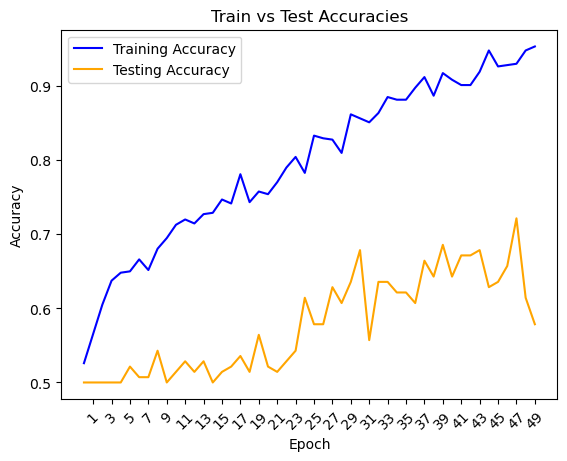

In [34]:
sns.lineplot(x = range(50), y = train_accuracies, color = "blue", label = "Training Accuracy")
sns.lineplot(x = range(50), y = test_accuracies, color = "orange", label = "Testing Accuracy")
plt.title("Train vs Test Accuracies")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(range(1,50,2), rotation = 45)
plt.yticks(label = range(1,100,15))
plt.legend()
plt.show()

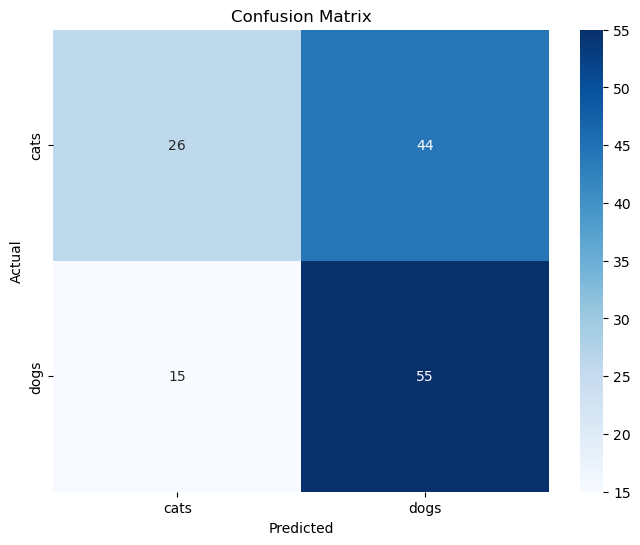

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_targets, all_predictions)
labels = dataset.classes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
